# Data Story
When it comes to plots regarding NFL games, there are a few important things to keep in mind. First off, while plenty of statistics can have an impact on you winning, many times the overall spread does not appear to be statistically significant. If extremes at the end increase your chances of winning, that is likely because they are outliers and not necessarily indicative of a positive trend. While there are many plots to discuss, I focused on the ones that caught my eye the most.
<br>

Also, as most of the Bar Plots will show, the Road and Home teams tend to start at different points when it comes to winning percentage. While Home teams usually begin a plot with around a 50% chance of winning, Road teams start around 40%. This means that while Home teams can have higher percentages of winning because of a statistic, it may not lead to as much of an increase as it does for Road teams. Anything that gets them over the 50% mark is important. Many of the aspects that explain why Road teams start low are hard to quantify (traveling, unfamiliar hotels, lower quality locker rooms, etc.) but know that this is expected.
<br>

Finally, remember that these Bar Plots show the mean or calculated average so not every situation will end in the same result. With all of that out of the way, it is time to focus on plots that stood out to me for how they impacted a team's chances of winning.

In [1]:
# Importing necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_context("poster")
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [2]:
# Uploading DataFrame and inspecting its contents
df = pd.DataFrame()
df = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/NFL Capstone Project/Data Wrangling/nfl_df.csv', delimiter='\t', index_col=0)
df.head()

,Date,Home Field Goal Attempts,Home First Downs,Home Fourth Down Attempts,Home Fourth Down Successes,Home Fumble TDs,Home Fumbles,Home Fumbles Lost,Home Fumbles Recovered,Home Goal To Go Attempts,...,Road Time of Possession,Road Total TDs,Road Total Yds,Road Touchbacks,Road Two Point Conversion Attempts,Road Two Point Conversion Successes,Road Win,Road Wins,Season,Week Number
0,"on December 20, 2015",2,28,0,0,0,1,0,2,2,...,1352,2,438,1,0,0,True,0,nfl-2015-2016,15
1,"on November 29, 2015",2,26,1,0,0,0,0,0,2,...,1353,1,397,1,0,0,True,0,nfl-2015-2016,12
2,"on December 27, 2015",1,19,0,0,2,2,1,3,3,...,1784,1,265,0,1,1,False,0,nfl-2015-2016,16
3,"on November 22, 2015",2,21,0,0,0,2,0,1,1,...,1875,4,415,3,0,0,False,0,nfl-2015-2016,11
4,"on January 3, 2016",1,16,1,0,0,0,0,0,0,...,2197,4,382,7,0,0,True,1,nfl-2015-2016,17


## Plot 1
While the NFL is an offensive league, it's still important to focus on the defense because, as they say, "Defense Wins Championships." With that said, what are the most important things a defense should do? Some may say the focus is on giving up less points but you can lose low scoring and high scoring games. One important action that defenses can take is turn the other team over. And for Home teams, one type of turnover is critical: Fumbles.

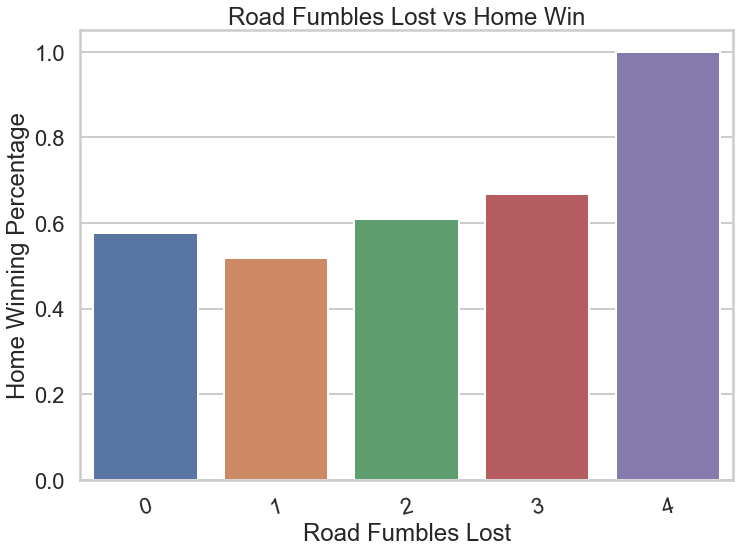

In [3]:
# Shows the Fumbles the Road team lost, meaning the Home team recovered them, compared to Home teams winning
df_RFBL_HW = df.groupby('Road Fumbles Lost')['Home Win'].mean().to_frame().reset_index()
_ = sns.barplot(x='Road Fumbles Lost', y='Home Win', data=df_RFBL_HW)
_ = plt.xticks(rotation=15)
_ = plt.ylabel('Home Winning Percentage')
_ = plt.title('Road Fumbles Lost vs Home Win')
_ = plt.savefig('Road Fumbles Lost vs Home Win.png')

** When looking at the above plot, we can see Home teams start off at the standard point expected when they have 0 fumbles recovered. After a slight dip in winning percentage with one fumble recovered, the win percentage slowly begins to rise. While 4 may seem like an extreme amount, fumbles are prevalent throughout the NFL so that amount is not uncommon. If you are a Home team, forcing and recovering fumbles on defense is key.**

## Plot 2
Sticking with defense, what stands out for Road teams? While turnovers are always good, none really saw a huge increase in the away team's ability to win. Another common metric teams focus on is sacks. Getting to the opposing quarterback can throw off any offense and some of the most famous defenses are known for the pressure they create. For Road teams, sacking the QB for a loss should be a top priority.

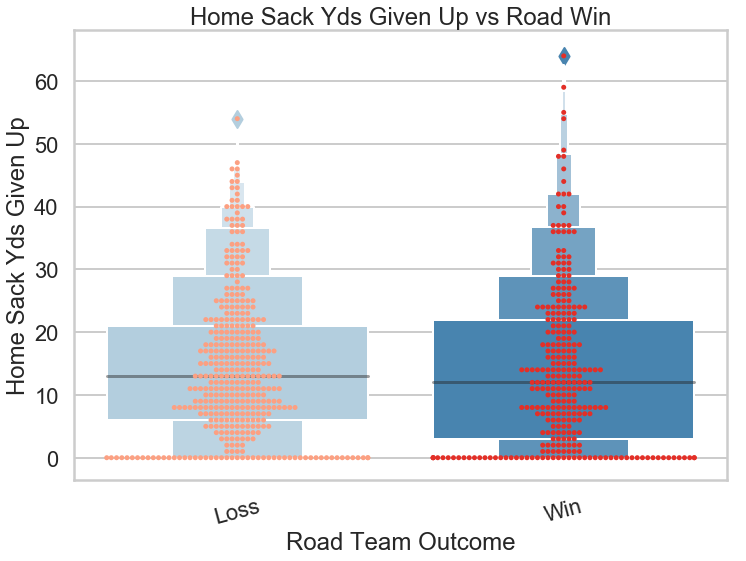

In [4]:
# Shows the Sack Yards the Home team gave up, meaning the Road team accumulated, compared to Road teams winning
_ = sns.boxenplot(y='Home Sack Yds Given Up', x='Road Win', data=df, palette='Blues')
_ = sns.swarmplot(y='Home Sack Yds Given Up', x='Road Win', data=df, palette='Reds')
_ = plt.xticks([False, True], ['Loss', 'Win'], rotation=15)
_ = plt.xlabel('Road Team Outcome')
_ = plt.title('Home Sack Yds Given Up vs Road Win')
_ = plt.savefig('Home Sack Yds Given Up vs Road Win.png')

** While the median in a loss may be higher than that in a win, as the team racks up more sack yards, the more likely they are to win. If you only sack your opponent for 10 to 20 yards total, it may not seem like a big difference. But past that, the trend starts to favor winning. This means that calling more blitzes and finding ways to sack the QB can be highly beneficial for a Road team's chances of winning.**

## Plot 3
Offensively for Road teams, there was a similar pattern as that for Home teams in most of the key categories. Whether it was points, rushing yards or passing yards, nothing saw too much of a positive trend except for extreme outliers. But one sometimes forgotten aspect of offensive statistics is the ability to get a First Down. Keeping drives alive for as long as possible is generally considered smart practice. For Road teams, passing for First Downs was immensely helpful.

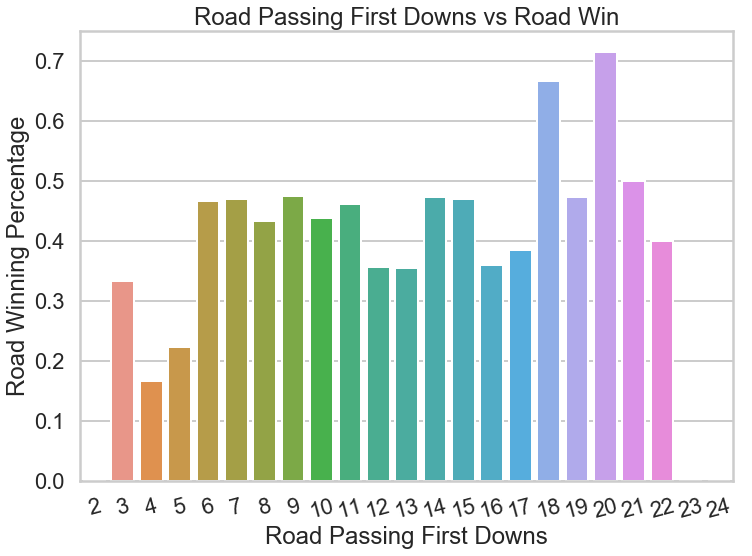

In [5]:
# Shows the Passing First Downs the Road team accumulated compared to Road teams winning
df_RPFD_RW = df.groupby('Road Passing First Downs')['Road Win'].mean().to_frame().reset_index()
_ = sns.barplot(x='Road Passing First Downs', y='Road Win', data=df_RPFD_RW)
_ = plt.xticks(rotation=15)
_ = plt.ylabel('Road Winning Percentage')
_ = plt.title('Road Passing First Downs vs Road Win')
_ = plt.savefig('Road Passing First Downs vs Road Win.png')

** Starting off at low percentage for a low amount of passing First Downs, we begin to see an upward trend for Road teams that overall keeps them solidly within the 40% range (though some surprise dips here and there). As they start to reach their peak, however, the winning percentage increases even more topping off at around 70%. While this could be seen as outliers, another plausible explanation is teams that take their time going down the field may actually be increasing their chances of winning especially when throwing for First Downs. If more Road teams consistently did this, this plot could have even more of an upward trend.**

## Plot 4
When you are a Road team, common thought is you should be aggressive. If you have a chance to be tying late or going for the win, many say to go for it all. While nothing in those categories stuck out too much, there is some strength to the argument for being aggressive. Most of the times on Fourth Down, teams punt or go for a Field Goal depending on their field position with only a few attempts to convert the down here and there. However, Road teams may actually benefit for trying to go for Fourth Down more.

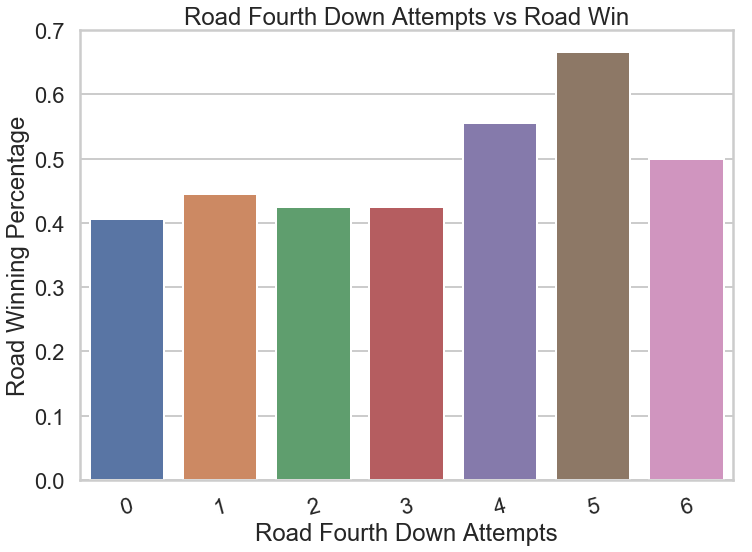

In [6]:
# Shows the Fourth Down Attempts the Road team tried compared to Road teams winning
df_RFDA_RW = df.groupby('Road Fourth Down Attempts')['Road Win'].mean().to_frame().reset_index()
_ = sns.barplot(x='Road Fourth Down Attempts', y='Road Win', data=df_RFDA_RW)
_ = plt.xticks(rotation=15)
_ = plt.ylabel('Road Winning Percentage')
_ = plt.title('Road Fourth Down Attempts vs Road Win')
_ = plt.savefig('Road Fourth Down Attempts vs Road Win.png')

** What stands out here for going on Fourth Down is that, while going for it only a few times does not impact a lot, when you go for it more your chances raise considerably. 0 to 3 attempts and a Road team's chances are around 40% but doing it 4 times raises them over 50% and going 5 times gets the winning percentage closer to 70%. That is a dramatic increase in win percentage for a move that gets overlooked. And keep in mind, this is just going for Fourth Down. Even if you are not successful each time, all that matters is your chances increase by just attempting it several times.**

## Plot 5
Now we have already talked about the different ways on offense and defense that Road teams can help their chances of winning. But there is another aspect that also has a significant impact on their ability to win? While some may think I am heading towards a point about Special Teams that is only about a third correct. Because this next stat involves all three phases of football: Penalties.

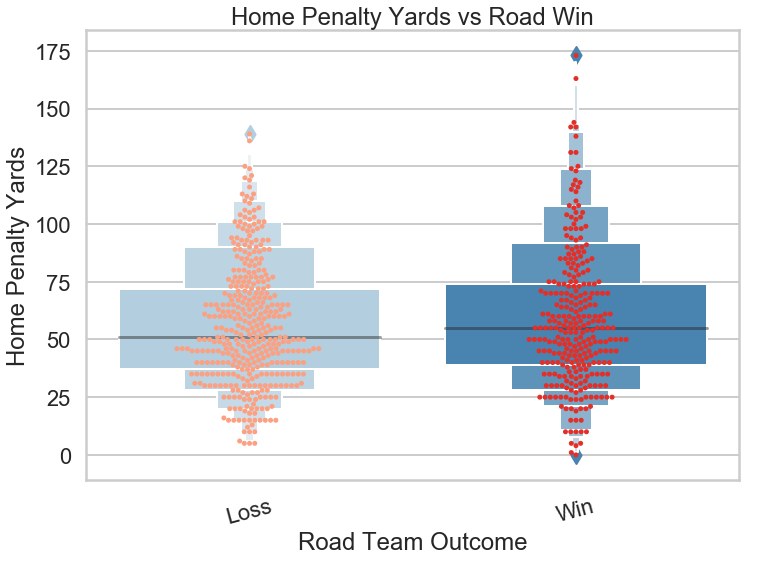

In [7]:
# Shows the Penalty Yards the Home team gave up, meaning the Home team got penalized for, compared to Road teams winning
_ = sns.boxenplot(y='Home Penalty Yards', x='Road Win', data=df, palette='Blues')
_ = sns.swarmplot(y='Home Penalty Yards', x='Road Win', data=df, palette='Reds')
_ = plt.xticks([False, True], ['Loss', 'Win'], rotation=15)
_ = plt.xlabel('Road Team Outcome')
_ = plt.title('Home Penalty Yards vs Road Win')
_ = plt.savefig('Home Penalty Yards vs Road Win.png')

** The more penalty yards the Road team can milk out of the Home team, the better for them. You may think this is the same for both teams but it is not. In the plots I found, penalties and penalty yards both help the Road team. And this is a category that can be impacted by all phases of a team so whether an offensive player forces a pass interference, a defensive player is held while rushing the passer or a special teamer gets blocked in the back, they all can help the Road team win. While I have talked a lot about how away teams can better their chances, penalties from the Home team are one of the more overlooked benefits for the visiting team.**

## Plot 6
Shifting back to Home teams, we know that a lot of the statistics are likely to favor them solely because they are at home. As mentioned earlier, most stats already gave them about a 10% win percentage higher than that of Road teams. But that does not mean there are not some statistics that are surprising in how they impact a Home team's chance of winning. Sometimes even giving up a score on a turnover actually betters their chances.

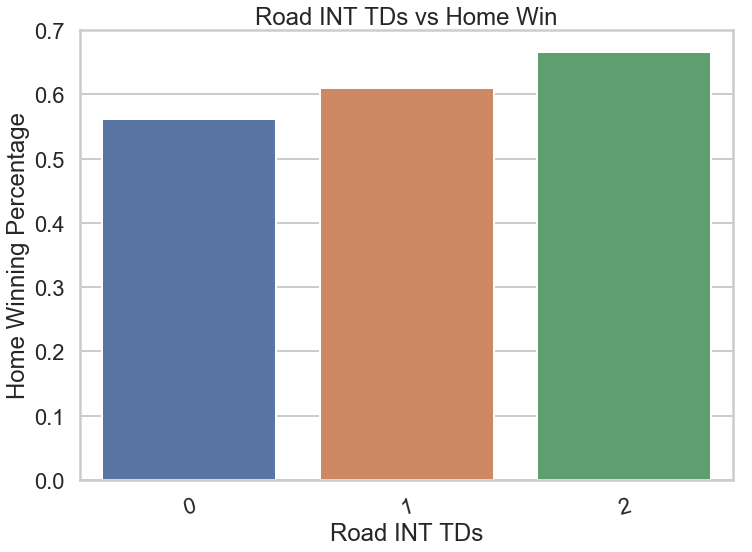

In [8]:
# Shows the Interceptions returned for Touchdowns the Home team gave up, meaning the Road team accumulated, compared to Home teams winning
df_RITD_HW = df.groupby('Road INT TDs')['Home Win'].mean().to_frame().reset_index()
_ = sns.barplot(x='Road INT TDs', y='Home Win', data=df_RITD_HW)
_ = plt.xticks(rotation=15)
_ = plt.ylabel('Home Winning Percentage')
_ = plt.title('Road INT TDs vs Home Win')
_ = plt.savefig('Road INT TDs vs Home Win.png')

** Very surprisingly, a Home team sees its win percentage increase with each interception that the opposing team returns for a Touchdown. This means giving away points to the other team is actually a good thing. While it may not be an enormous increase, going up about 5% each time is shocking considering turning the ball over and giving the other team points should hurt your team. But instead Home teams are better off in the long run when they throw an Interception Touchdown.**

## Plot 7
Along the same lines of surprising helpful statistics for Home teams, defensively they do not have to be as strong as Road teams. Not that any of the standard statistics that many focus on are too different compared to away teams but when you are at home there is already a favorability that has been mentioned before. In this upcoming plot (and the one after), we will see how defensive statistics that should hurt Home teams are actually beneficial. The first one to discuss is giving up scores in Goal To Go situations.

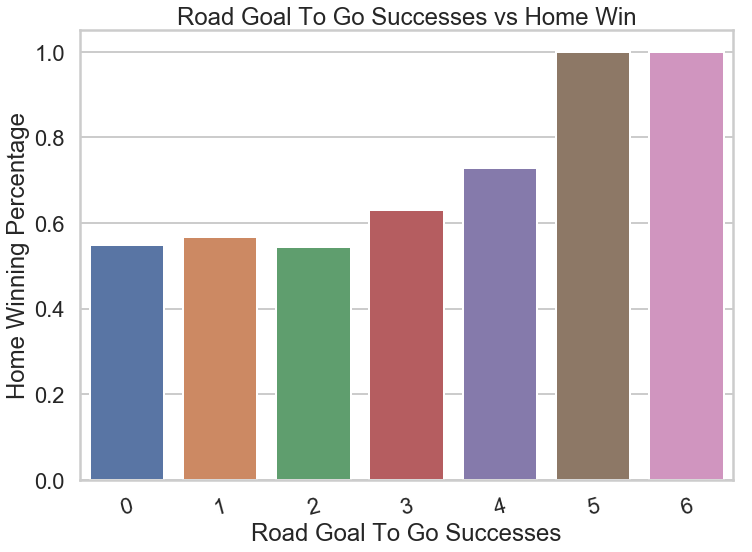

In [9]:
# Shows the Goal To Go Successes the Home team gave up, meaning the Road team accumulated, compared to Home teams winning
df_RGTGS_HW = df.groupby('Road Goal To Go Successes')['Home Win'].mean().to_frame().reset_index()
_ = sns.barplot(x='Road Goal To Go Successes', y='Home Win', data=df_RGTGS_HW)
_ = plt.xticks(rotation=15)
_ = plt.ylabel('Home Winning Percentage')
_ = plt.title('Road Goal To Go Successes vs Home Win')
_ = plt.savefig('Road Goal To Go Successes vs Home Win.png')

** In case the vernacular is confusing, a Goal To Go attempt is when a team has a down where the line to gain is the end zone (like First and Goal, Second and Goal, etc.). When looking at this plot, a Home team's chances improve as they give up more scores in these situations. And while the end bars may seem like outliers, in the NFL today, 30+ point games are not uncommon. So if a Home team gives up 5 scores in Goal To Go situations, they should win meaning, again, allowing points for the away team is not bad for the team at home.**

## Plot 8
As an extension of the last plot, we now see that Home teams are not impacted negatively by giving up scores in scoring situations. But that is just when a team is close to the end zone. Does this mean that this always the case? What about big plays that end with a Touchdown? Does giving up a lot of points hurt their chances or at least even out like Road teams? Actually, Home teams see their chances go up when allowing more points.

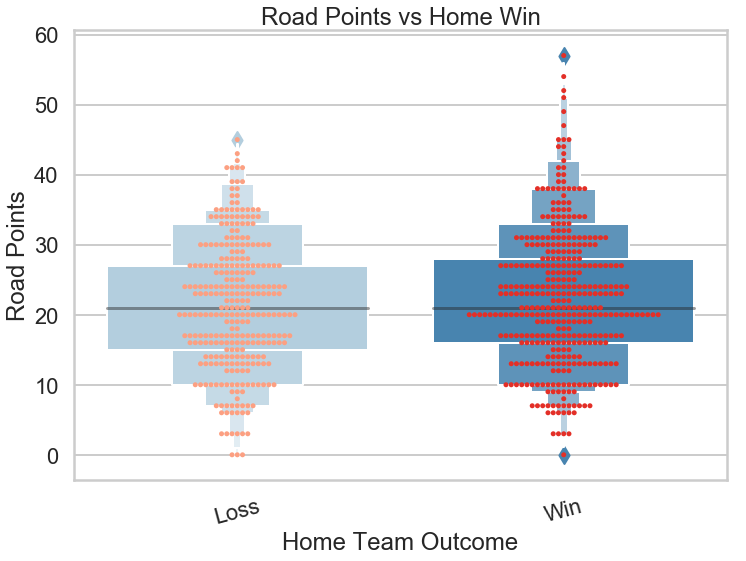

In [10]:
# Shows the Points scored the Home team gave up, meaning the Road team accumulated, compared to Home teams winning
_ = sns.boxenplot(y='Road Points', x='Home Win', data=df, palette='Blues')
_ = sns.swarmplot(y='Road Points', x='Home Win', data=df, palette='Reds')
_ = plt.xticks([False, True], ['Loss', 'Win'], rotation=15)
_ = plt.xlabel('Home Team Outcome')
_ = plt.title('Road Points vs Home Win')
_ = plt.savefig('Road Points vs Home Win.png')

** As we have seen in previous boxen and swarm plots, while the medians may be similar, in higher elevations a team's chances of winning goes up. For Home teams this means giving up lots of points to the Road team (especially 40 and over) gives them a very good chance of winning. While this doesn't necessarily mean they want to give up a lot of points, it will not hurt them in the long run.**

# Conclusion
If there is something to learn from these specific plots it is a general strategy of how both Road and Home teams should play in an NFL game. Road teams would be best to focus on low scoring games where they can take their time going down the field, being aggressive on Fourth Down and defense as well as forcing penalties when they can. Home teams, on the other hand, should try to get in a shootout where defensively they do not worry about the points they allow but instead focus on forcing and recovering fumbles. Now, as mentioned in the beginning, many of these plots show the averages so the expected result may not happen every time but these are statistics that I want to dive into more to find deeper meaning into how much of an impact they truly have on winning.